In Statistics is all about working with data, be it processing, analyzing, or drawing a conclusion from the data we have. In the context of a given dataset, statistics has two main goals: describing the data, and drawing conclusions from it. These goals coincide with the two main categories of statistics — descriptive statistics and inferential statistics — respectively.

## Categorical Data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [2]:
weather_df = pd.DataFrame({'temp': [55, 34, 80, 75, 53], 'weather': ['windy','cloudy','sunny','rainy','sunny']})
weather_df

,temp,weather
0,55,windy
1,34,cloudy
2,80,sunny
3,75,rainy
4,53,sunny


In [3]:
weather_df['weather_encoded'] = weather_df['weather'].map({'windy': 0, 'cloudy': 1, 'sunny': 2, 'rainy': 3})
weather_df

,temp,weather,weather_encoded
0,55,windy,0
1,34,cloudy,1
2,80,sunny,2
3,75,rainy,3
4,53,sunny,2


In [4]:
pd.get_dummies(weather_df['weather'])

,cloudy,rainy,sunny,windy
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In terms of making predictions, if a categorical attribute is the target of our machine learning pipeline (as in, if we want to predict a categorical attribute), classification models are needed. As opposed to regression models, which make predictions on numerical, continuous data, classification models, or classifiers for short, keep in mind the possible values their target attribute can take and only predict among those values. Thus, when deciding which machine learning model(s) you should train on your dataset to predict categorical data, make sure to only use classifiers.

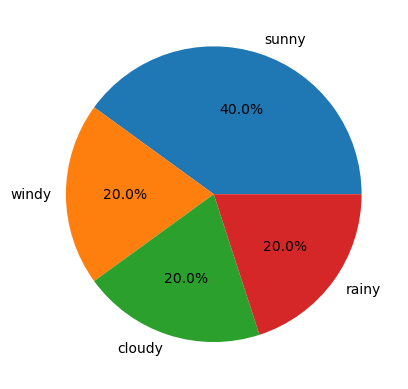

In [5]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [6]:
student_df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
                           'sex': ['female', 'male','female', 'male', 'male', 'female'],
                           'class': ['FY', 'SO', 'SR', 'SO',' JR', 'SR'],
                           'gpa': [90, 93, 97, 89, 95, 92],'num_classes': [4, 3, 4, 4, 3, 2]})
student_df

,name,sex,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


A binary attribute, whose values can only be True and False, is a categorical attribute whose set of possible values contains the two Boolean values mentioned. Since Boolean values can be easily interpreted by machine learning and mathematical models, there is usually not a need to convert a binary attribute into any other form.

In [7]:
student_df['female_flag'] = student_df['sex'] == 'female'
student_df = student_df.drop('sex', axis=1)
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


In [8]:
import seaborn as sns

In [9]:
weather_df = pd.read_csv('weather_data.csv')
weather_df.head()

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy


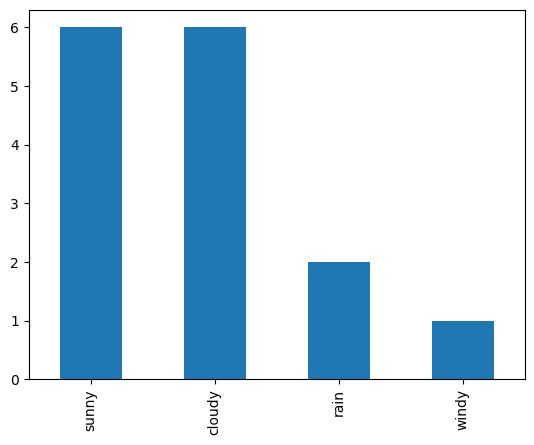

In [10]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

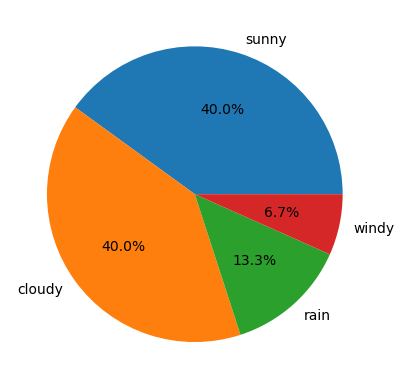

In [11]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [12]:
weather_df.groupby(['weather', 'city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


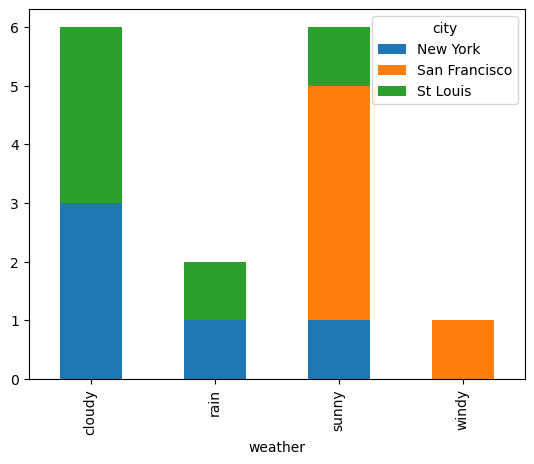

In [13]:
weather_df.groupby(['weather', 'city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar', stacked=True) 
plt.show()

## Numerical Data 

As opposed to a few probability distributions that can be used to model categorical data, there are numerous probability distributions for numerical data. These include the normal distribution (also known as the bell curve distribution), the uniform distribution, the exponential distribution, and many more. Each of these probability distributions is designed to model specific types of data. For example, the normal distribution is typically used to model quantities with linear growth such as age, height, or students' test scores, while the exponential distribution models the amount of time between the occurrences of a given event.

On another topic, many processing techniques can be applied to numerical data. Two of the most common of these include scaling and normalization.

Scaling involves adding and/or multiplying all the values in a numerical attribute by a fixed quantity to scale the range of the original data to another range. This method is used when statistical and machine learning models can only handle values within a given range (for example, positive numbers or numbers between 0 and 1 can be processed and analyzed more easily)

For example, say the data we have in a numerical attribute follows a normal distribution with a mean of 4 and a standard deviation of 10. The following code randomly generates that data synthetically and visualizes it:

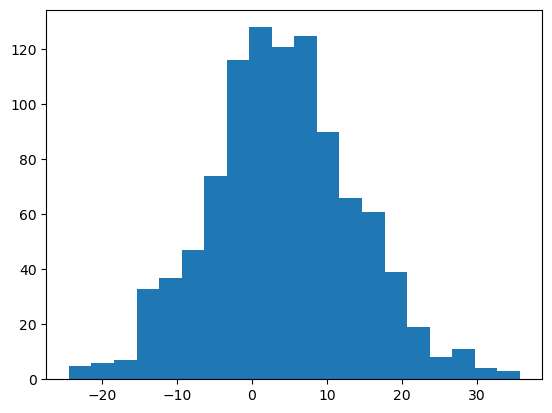

In [14]:
samples = np.random.normal(4, 10, size=1000)
plt.hist(samples, bins=20)
plt.show()

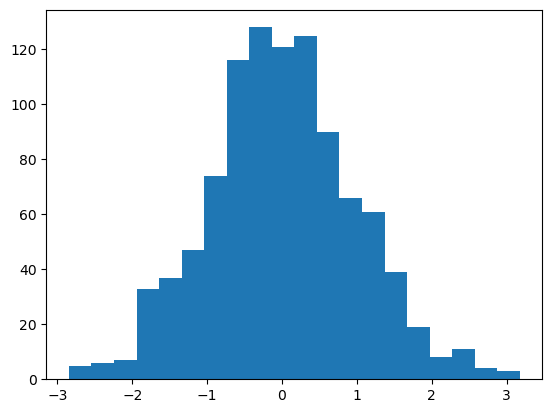

In [15]:
normalized_samples = (samples - 4) / 10
plt.hist(normalized_samples, bins=20)
plt.show()

The mean, which is calculated to be the average of all the values from the probability distribution, is suitable for estimating the center of the distribution. In its standard form, as we have seen, the normal distribution has a mean of 0, indicating that its data revolves around point 0 on the axis.

The standard deviation, on the other hand, represents how much the data points vary from the mean. Without going into much detail, in a normal distribution, it is calculated to be the mean distance from the mean of the distribution. A low-valued standard deviation indicates that the data does not deviate too much from the mean, while a high-valued standard deviation implies that the individual data points are quite different from the mean.

The standard deviation, as we have mentioned, calculates the difference between each data point and the mean of a numerical attribute, squares them, takes their average, and finally takes the square root of the result. The further away the individual data points are from the mean, the larger this quantity gets, and vice versa. This is why it is a good indicator of how dispersed a dataset is.



## Visualizing Probability Density

In [16]:
samples = np.random.normal(size=1000)
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75) 

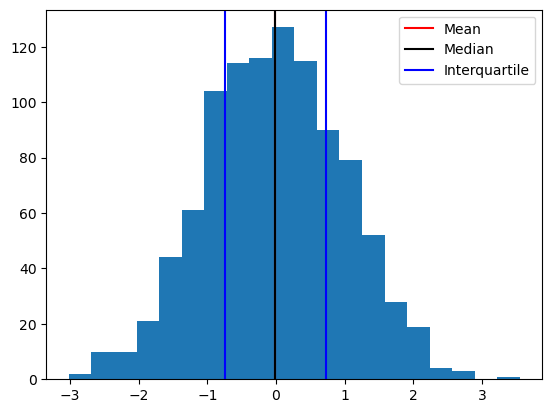

In [17]:
plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

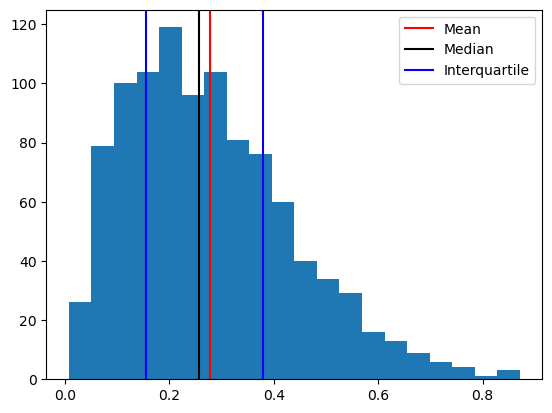

In [18]:
samples = np.random.beta(2, 5, size=1000)
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)
plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

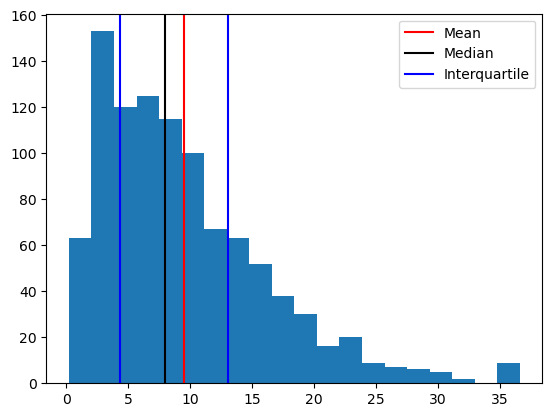

In [19]:
samples = np.random.gamma(2, 5, size=1000)
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)
plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

In [20]:
df = pd.DataFrame({'numerical': np.random.normal(size=5),'categorical': ['a', 'b', 'a', 'c', 'b'],'ordinal': [1, 2, 3, 5, 4]})

In [21]:
df.describe()

,numerical,ordinal
count,5.000000,5.000000
mean,-0.336626,3.000000
std,0.620306,1.581139
min,-1.264693,1.000000
25%,-0.597456,2.000000
50%,-0.122956,3.000000
75%,-0.059479,4.000000
max,0.361452,5.000000


In [22]:
df.describe(include='all')

,numerical,categorical,ordinal
count,5.000000,5,5.000000
unique,NaN,3,NaN
top,NaN,a,NaN
freq,NaN,2,NaN
mean,-0.336626,NaN,3.000000
std,0.620306,NaN,1.581139
min,-1.264693,NaN,1.000000
25%,-0.597456,NaN,2.000000
50%,-0.122956,NaN,3.000000
75%,-0.059479,NaN,4.000000


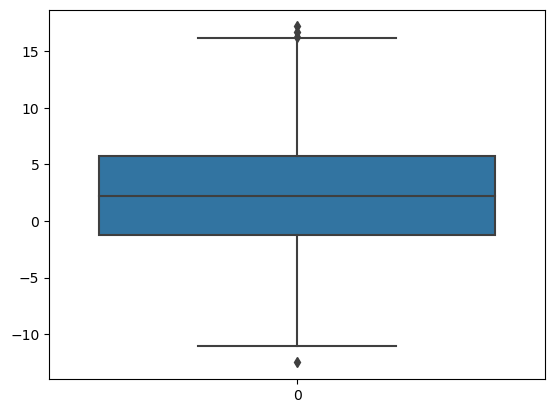

In [23]:
sns.boxplot(np.random.normal(2, 5, size=1000))
plt.show()

n the preceding boxplot, the blue box in the middle denotes the interquartile range of the input data (from the 25- to 75-percent quartile). The vertical line in the middle of the box is the median, while the two thresholds on the left and right but outside of the box denote the minimum and maximum of the input data, respectively.

It is important to note that the minimum is calculated to be the 25-percent quartile minus the interquartile range multiplied by 1.5, and the maximum the 75-percent quartile plus the interquartile range also multiplied by 1.5. It is common practice to consider any number outside of this range between the minimum and the maximum to be outliers, visualized as black dots in the preceding graph.

In [24]:

df = pd.DataFrame({'numerical': np.random.normal(size=1000),
                   'categorical': np.random.choice(['a', 'b', 'c'], size=1000),
                   'ordinal': np.random.choice([1, 2, 3, 4, 5], size=1000)})


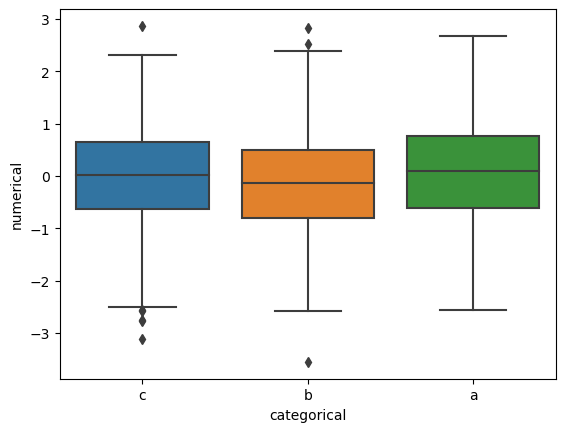

In [25]:
sns.boxplot(y='numerical', x='categorical', data=df)
plt.show()

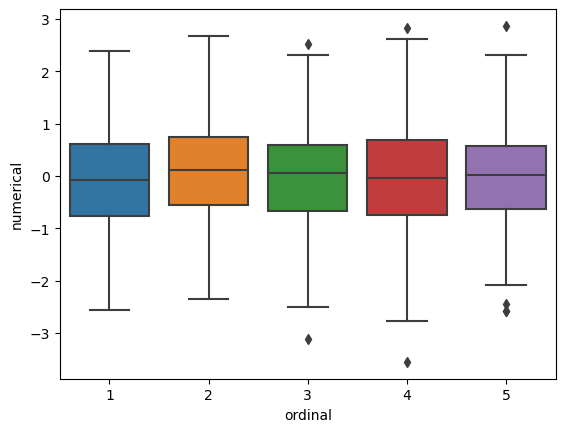

In [26]:
sns.boxplot(y='numerical', x='ordinal', data=df)
plt.show()

## Inferential Statistics

Unlike descriptive statistics, where our goal is to describe various characteristics of a dataset using specific quantities, with inferential statistics, we'd like to perform a particular statistical modeling process on our dataset so that we can infer further information, either about the dataset itself or even about unseen data points that are from the same population.



### T-Tests

In general, t-tests (also known as Student's t-tests) are used to compare two mean (average) statistics and conclude whether they are different enough from each other. The main application of a t-test is comparing the effect of an event (for example, an experimental drug, an exercise routine, and so on) on a population against a controlled group. If the means are different enough (we call this statistically significant), then we have good reason to believe in the effect of the given event.

There are three main types of t-tests in statistics: independent samples t-tests (used to compare the means of two independent samples), paired sample t-tests (used to compare the means of the same group at different times), and one-sample t-tests (used to compare the mean of one group with a predetermined mean).

The general workflow of a t-test is to first declare the null hypothesis that the two means are indeed equal and then consider the output of the t-test, which is the corresponding p-value. If the p-value is larger than a fixed threshold (usually, 0.05 is chosen), then we cannot reject the null hypothesis. If, on the other hand, the p-value is lower than the threshold, we can reject the null hypothesis, implying that the two means are different. We see that this is an inferential statistics method as, from it, we can infer a fact about our data; in this case, it is whether the two means we are interested in are different from each other.

In [27]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2, 1, size=20)

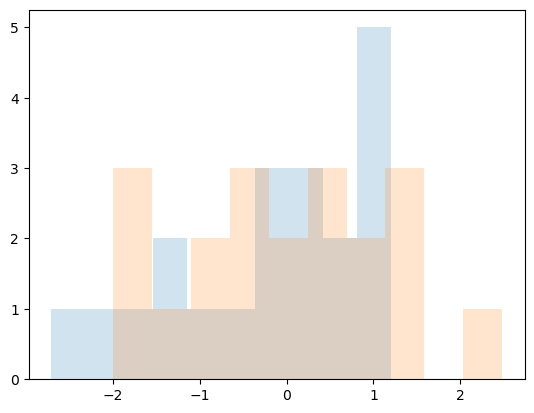

In [28]:
plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [29]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

0.5727193789274367

With this result, we do not reject our null hypothesis. Again, your p-value might be different from the preceding output, but chances are it is not lower than 0.05 either. Our final conclusion here is that we don't have enough evidence to say that the means of our two arrays are different (even though they were actually generated from two normal distributions with different means)

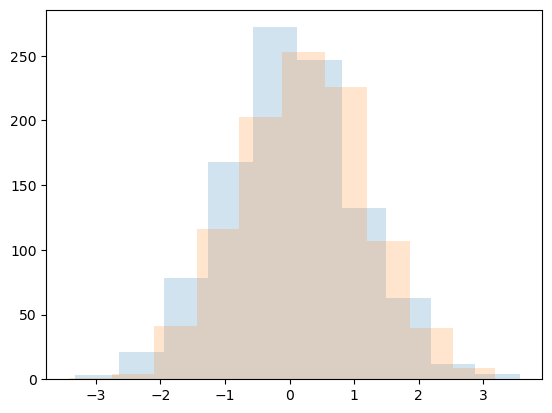

In [30]:
samples_a = np.random.normal(size=1000)
samples_b = np.random.normal(0.2, 1, size=1000)
plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [31]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

1.7044220404583163e-05

This p-value is a lot lower than 0.05, thus rejecting the null hypothesis and giving us enough evidence to say that the two arrays have different means.

These two experiments demonstrated a phenomenon we should keep in mind. In the first experiment, our p-value wasn't low enough for us to reject the null hypothesis, even though our data was indeed generated from two distributions with different means. In the second experiment, with more data, the t-test was more conclusive in terms of differentiating the two means.

### Correlation matrix

A correlation matrix is a two-dimensional table containing correlation coefficients between each pair of attributes of a given dataset. A correlation coefficient between two attributes quantifies their level of linear correlation, or in other words, how similarly they behave in a linear fashion. A correlation coefficient lies in the range between -1 and +1, where +1 denotes perfect linear correlation, 0 denotes no correlation, and -1 denotes perfect negative correlation.

If two attributes have a high linear correlation, then when one increases, the other tends to increase by the same amount multiplied by a constant. In other words, if we were to plot the data in the two attributes on a scatter plot, the individual points would tend to follow a line with a positive slope. For two attributes having no correlation, the best-fit line tends to be horizontal, and two attributes having a negative correlation are represented by a line with a negative slope.

The correlation between two attributes can, in a way, tell us how much information is shared among the attributes. We can infer from two correlated attributes, either positively or negatively, that there is some underlying relationship between them. This is the idea behind the correlation matrix as an inferential statistics tool.

In some machine learning models, it is recommended that if we have highly correlated features, we should only leave one in the dataset before feeding it to the models. In most cases, having another attribute that is highly correlated to one that a model has been trained on does not improve its performance; what's more, in some situations, correlated features can even mislead our models and steer their predictions in the wrong direction.

This is to say that the correlation coefficient between two data attributes, and thus the correlation matrix of the dataset, is an important statistical object for us to consider

In [32]:
x = np.random.rand(500,)
y = x * 2 + np.random.normal(0, 0.3, 500)
z = np.random.rand(500,)
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

In [33]:
df.corr()

,x,y,z
x,1.000000,0.887883,-0.029919
y,0.887883,1.000000,-0.019611
z,-0.029919,-0.019611,1.000000
